In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt


Creacion de dataset artificial que ilustre el problema.

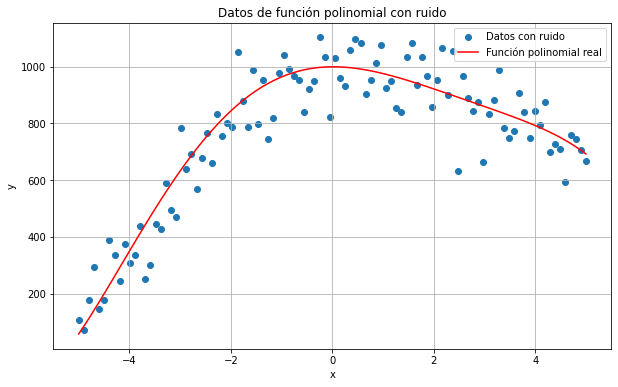

In [2]:
def polynomial_function(x):
    return - 0.1 * x**5 + 0.2 * x**4 + 5 * x**3 - 30 * x**2 + 1 * x + 1000

# Generar datos para la función polinomial
X_train = np.linspace(-5, 5, 100)  # Valores de x
y_train_perfect = polynomial_function(X_train) # Valores de y

# Agregar ruido a los datos
np.random.seed(42)
y_train = y_train_perfect + np.random.normal(0, 100, size=X_train.shape)

# Visualizar los datos
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Datos con ruido')
plt.plot(X_train, y_train_perfect, color='red', label='Función polinomial real')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos de función polinomial con ruido')
plt.legend()
plt.grid(True)
plt.show()


Agregamos algunos datos linealmente relacionados

In [3]:
model = LinearRegression()
model.fit(X_train.reshape(-1,1), y_train)
print(model.coef_, model.intercept_)
#Creo un 20% de puntos sobre la recta
X_test = np.linspace(-5, 5, 20)
y_test = [x*model.coef_[0]+model.intercept_ for x in X_test ]


[51.0165292] 760.581677539847


Creamos el dataframe con ambos conjuntos

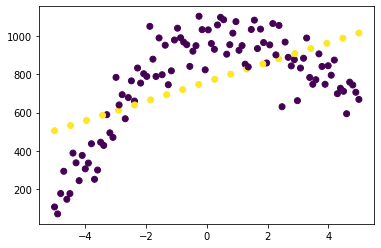

In [4]:
df1 = pd.DataFrame({
    "F1":X_train,
    "T":0,
    "target":y_train
    
})

df2 = pd.DataFrame({
    "F1":X_test,
    "T":1,
    "target":y_test
    
})
df = pd.concat([df1, df2], ignore_index=True)
df = df.sample(frac=1, ignore_index=True, random_state=42)
col_pred=["F1", ] 
col_target = "target"
plt.scatter(df[col_pred], df[col_target], c=df["T"])

In [5]:
#No ejecutar, demora 20 minutos, los valores que generar el problema son los
#expuestos en las siguientes celdas
acc = 0
maxT = 0
for i in range(0, 120000): #200000
    X_train, X_test, y_train, y_test = train_test_split(df[["F1", "T"]], df[col_target], shuffle=True, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train[col_pred], y_train)
    y_pred = model.predict(X_test[col_pred])
    nacc = r2_score(y_test, y_pred) #sqrt(mean_squared_error(y_test, y_pred))
    #print(nacc)
    if((X_test["T"]==1).sum()>maxT):
        maxT = (X_test["T"]==1).sum()
        print("MaxT=>", maxT, "random_state=>", i, "nacc=>", nacc)
    if (nacc>acc):
        acc = nacc
        print(acc, i, maxT)


MaxT=> 5 random_state=> 0 nacc=> 0.20264280764094889
0.20264280764094889 0 5
0.3620730423711567 1 5
0.4340213796241098 4 5
0.44486381269356023 5 5
MaxT=> 6 random_state=> 6 nacc=> 0.3934099081354667
0.4975121031085801 9 6
MaxT=> 7 random_state=> 15 nacc=> 0.45775938727249754
0.5924985063073911 18 7
MaxT=> 8 random_state=> 27 nacc=> 0.32864847480379644
0.5977577947232737 81 8
MaxT=> 9 random_state=> 173 nacc=> 0.267744567854571
MaxT=> 10 random_state=> 707 nacc=> 0.5238414439920582
0.5988301918852146 778 10
MaxT=> 11 random_state=> 792 nacc=> 0.5518822470617493
0.698042276974468 1044 11
0.7358036330551317 26565 11


KeyboardInterrupt: 

La muestra son datos muy cercanos a la recta pero solo por azar, no es representativa de la población.

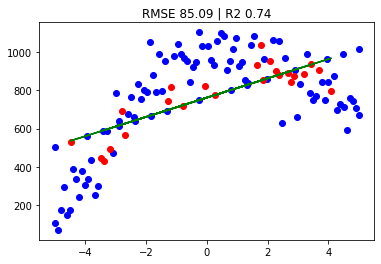

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[["F1", "T"]], df[col_target], shuffle=True, test_size=0.2, random_state=100700)
model = LinearRegression()
model.fit(X_train[col_pred], y_train)
y_pred = model.predict(X_test[col_pred])
plt.scatter(X_train[col_pred], y_train, c='b')
plt.scatter(X_test[col_pred], y_test, c='r')
plt.title("RMSE {:.2f} | R2 {:.2f}".format(sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)))
plt.plot(X_test.loc[:,col_pred].values, (model.coef_[0]*X_test[col_pred]+model.intercept_).values, c='g')

Cuando usamos otra muestra la metrica cambia completamente.

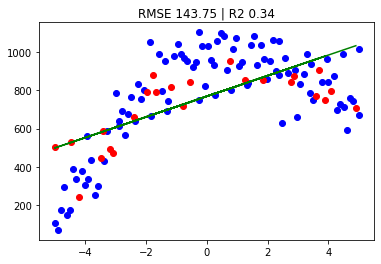

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[["F1", "T"]], df[col_target], shuffle=True, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train[col_pred], y_train)
y_pred = model.predict(X_test[col_pred])
plt.scatter(X_train[col_pred], y_train, c='b')
plt.scatter(X_test[col_pred], y_test, c='r')
plt.title("RMSE {:.2f} | R2 {:.2f}".format(sqrt(mean_squared_error(y_test, y_pred)), r2_score(y_test, y_pred)))
plt.plot(X_test.loc[:,col_pred].values, (model.coef_[0]*X_test[col_pred]+model.intercept_).values, c='g')

----